## Week 6: Wave + Convection; Consistency, Stability, Convergence 

In [102]:
import numpy as np
import sympy as sp
import math
from matplotlib import pyplot
from matplotlib import animation
from IPython.display import HTML
%matplotlib inline

In [7]:
sp.init_printing()

In [11]:
def rho_green(x, rho_light):
    rho = np.zeros_like(x)
    mask = np.where(x < 2.0)
    rho[mask] = rho_light * x[mask] / 2.0
    return rho

In [43]:
# Initial Conditions
nx = 81
L = 4.
xL = 2
dx = L / (nx - 1)
nt = 30
u_max = 1.0            # maximum speed allowed on road
rho_max = 10.          # max 
rho_light = 10.        # density at stoplight

x = np.linspace(0.0, L, num = nx)

rho0 = rho_green(x, rho_light)

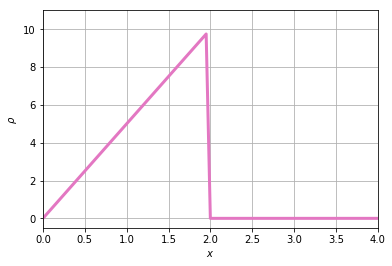

In [44]:
# Initial Car Density Plot
pyplot.figure(figsize=(6.,4.))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
pyplot.plot(x, rho0, color='C6', linestyle='-', linewidth = 3)
pyplot.xlim(0.0, L)
pyplot.ylim(-0.5, 11);

In [45]:
# Flux Function to calculate flux given certain input parameters
def flux(rho, u_max, rho_max):
    F = rho * u_max * (1 - rho / rho_max)
    return F

In [98]:
# FTBS Function to Calculate Discretized Solution
def ftbs(dt, dx, rho0, nt, bc_vals, *args):
    rho_hist = [rho0.copy()]
    rho = rho0.copy()
    for n in range(nt):
        # Compute the flux.
        F = flux(rho, *args)
        # Advance in time.
        rho[1:] = rho[1:] - dt / dx * (F[1:] - F[:-1])
        # Set the left boundary condition.
        rho[0] = bc_value
        # Record the time-step solution.
        rho_hist.append(rho.copy())
    return rho_hist

In [56]:
# CFL Limit Stuff
sigma = 1
dt = sigma * dx / u_max

In [48]:
# Velocity Function to return the velocity
def velocity(rho, rho_max, u_max):
    u = u_max * (1 - rho / rho_max)
    return u

In [49]:
# Initial Conditions Function
def ic(x, xL, rho_L):
    rho0 = np.zeros_like(x)
    mask = np.where((x < xL) & (x >= 0))
    rho0[mask] = rho_L * (x[mask]/xL)
    return rho0

In [57]:
a = ic(x, xL, rho_max)

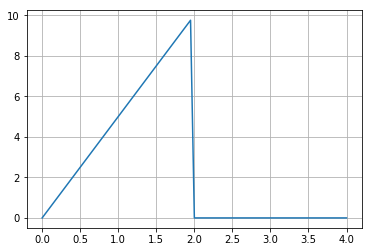

In [88]:
fig = pyplot.plot(x, a)
pyplot.grid()

In [78]:
def ftbs2(u_max, rho0, dt, dx, nt):
    rho_hist = [rho0.copy()]
    for q in range(nt):
        rho_2 = rho0.copy()
        for i in range(1, nx-1):
            rho_2[i+1] = rho_2[i] + dt/dx * (flux(rho_2[i], u_max, rho_max) - flux(rho_2[i-1], u_max, rho_max))
            rho_hist.append(rho_2.copy())
    return rho_hist

In [97]:
rho_hist = ftbs2(u_max, rho0, dt, dx, nt);

In [107]:
def plot_update(n, rho_hist):
    fig.suptitle('Time Step {:0>2}'.format(n))
    line.set_ydate(rho_hist[n])

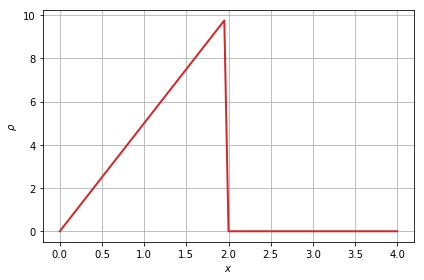

In [108]:
# Initial Traffic Density Plotted
fig = pyplot.figure(figsize=(6.,4.))
pyplot.xlabel(r'$x$')
pyplot.ylabel(r'$\rho$')
pyplot.grid()
line = pyplot.plot(x, rho0, color='C3', linewidth = 2)[0]
fig.tight_layout()

In [109]:
anime = animation.FuncAnimation(fig, plot_update, frames = nt, fargs=(rho_hist,), interval=100)
HTML(anime.to_html5_video())

AttributeError: 'Line2D' object has no attribute 'set_ydate'